In [1]:
# HW2:  
# Getting started to process a text example
import nltk
from nltk import FreqDist

import re

In [2]:
#Hemingway Analysis
#hemingway = open('C:\\Users\\maria\\inourtime.txt')
#filetext = hemingway.read()


In [3]:
# get the text of the book Emma from the Gutenberg corpus, tokenize it,
#   and reduce the tokens to lowercase.
file7 = nltk.corpus.gutenberg.fileids( ) [7]
text = nltk.corpus.gutenberg.raw(file7)
len(text)

144395

In [4]:
#%%

## CODE IDEAS FOR HMW 2, Exploratory exercise for sentiment analysis
# finding adverb and adjective phrases, and computing basic statistics

# importing required nltk libraries
import nltk
from nltk import sent_tokenize

# loading our corpus (for this example: "Crime and Punishment," by F. Dostoevsky)
#f = open('CrimeAndPunishment.txt')
#text = f.read()
#print(text[:150])

#%%

# Preprocessing, as explained in the Labs
# Separate the text into sentences first
textsplit = nltk.sent_tokenize(text)
print(textsplit[:10])



["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I.", "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'", 'So she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.', "There was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, 'Oh dear!", 'Oh dear!', "I shall be late!'", '(when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the time\n

In [5]:
#%%

# Apply the word tokenizer to each sentence
tokentext = [nltk.word_tokenize(sent) for sent in textsplit]
print(tokentext[:2])
#the output is a list of strings that contains the sentences
type(tokentext)
len(tokentext)



[['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.'], ['Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'"]]


1625

In [6]:
#%%

## POS Tagging, to retrieve adjective (JJs) and adverb (RBs) tags

# use the Stanford POS tagger to POS tag tokens of each sentence
# this is the default tagger in nltk
taggedtext = [nltk.pos_tag(tokens) for tokens in tokentext]
print(taggedtext[:2])



[[('[', 'JJ'), ('Alice', 'NNP'), ("'s", 'POS'), ('Adventures', 'NNS'), ('in', 'IN'), ('Wonderland', 'NNP'), ('by', 'IN'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('1865', 'CD'), (']', 'NNP'), ('CHAPTER', 'NNP'), ('I', 'PRP'), ('.', '.')], [('Down', 'IN'), ('the', 'DT'), ('Rabbit-Hole', 'JJ'), ('Alice', 'NNP'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), (',', ','), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), (':', ':'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), (',', ','), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'N

In [7]:
#%%

# Following our NLTK textbook, chapter on Information Extraction--Chunking (https://www.nltk.org/book/ch07.html)

# Using CHUNKING to parse sentences 
# to look for "adjective phrases", i.e. phrases (or chunks) that have adverbs and adjectives ('RB'+'JJ')
# First step: writing a grammar that defines the POS in the chunk
# we name this grammar "ADJPH" ("ADJective PHrase") using regexes 

import re
grammar_adjph = "ADJPH: {<RB.?>+<JJ.?>}"
# This regex reads as: "find groups ("< >") of RBs (adverbs) together with groups of JJs (adjectives), with groups defineds as
# RBs with any ending (the "." is a placeholder or wildcard for the "R" and the "S" at the end of RBR and RBS, 
# while "?" indicates "optional character" so RB can be found alone as well). Same regex operators apply to JJs.

# Second step: import the nltk parser to process each sentence
chunk_parser_adj = nltk.RegexpParser(grammar_adjph)

adjph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adj.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADJPH':
                adjph_tags.append(subtree)
                


In [8]:
# Visualizing the actual adjective phrase
adjective_phrases = []
for sent in adjph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adjective_phrases.append(temp)
    
print('First 10 adjective phrases: ', adjective_phrases[:222])




First 10 adjective phrases:  ['very tired ', 'very sleepy ', 'so VERY remarkable ', 'so VERY much ', 'quite natural ', 'very deep ', 'very deep ', 'too dark ', 'very likely ', 'VERY good ', 'rather glad ', 'very much ', "n't much ", 'no longer ', 'too large ', 'too small ', 'not much larger ', 'very little ', 'so many ', 'very few ', 'really impossible ', 'almost certain ', 'very nice ', 'now only ten ', 'too slippery ', 'very good ', 'very fond ', 'very small ', 'quite surprised ', 'so much ', 'quite dull ', 'so much ', 'now more ', 'as much ', 'so desperate ', 'very hot ', 'very little ', 'ever so many ', 'so VERY tired ', 'very glad ', 'so small ', 'too bad ', 'so much ', 'so out-of-the-way ', 'very likely ', 'very tired ', 'very clear ', 'curly brown ', 'so useful ', 'as hard ', 'quite pale ', 'quite natural ', 'more energetic ', 'not easy ', 'quite dry ', 'very absurd ', 'so grave ', 'always ready ', 'always ready ', 'soon left ', 'here poor ', 'as sure ', 'so much ', 'much sooner

In [12]:
# Following our NLTK textbook, chapter 1 on Language Processing (https://www.nltk.org/book/ch01.html)

## FREQUENCY DISTRIBUTIONS
# Top 50 adjective phrases
freq_adjph = nltk.FreqDist(adjective_phrases)

print('Top adjective phrases by frequency: ')
for word, freq in freq_adjph.most_common(50):
    print(word, freq)

            


Top adjective phrases by frequency: 
so much  8
very curious  6
very glad  5
very much  4
very little  4
very likely  3
so many  3
too much  3
very tired  2
quite natural  2
very deep  2
n't much  2
very few  2
very good  2
as much  2
so grave  2
always ready  2
very uncomfortable  2
almost wish  2
very difficult  2
quite silent  2
certainly too much  2
not much  2
so large  2
n't very civil  2
very interesting  2
once more  2
very sleepy  1
so VERY remarkable  1
so VERY much  1
too dark  1
VERY good  1
rather glad  1
no longer  1
too large  1
too small  1
not much larger  1
really impossible  1
almost certain  1
very nice  1
now only ten  1
too slippery  1
very fond  1
very small  1
quite surprised  1
quite dull  1
now more  1
so desperate  1
very hot  1
ever so many  1


In [13]:
#print the list of our sentences:
print('Length of adjective phrase sentences: ', len(adjph_tags))




Length of adjective phrase sentences:  222


In [14]:
#%%

# Now we look for "adverb phrases" or chunks that have 2 consecutive adverbs ('RB')
# First step: writing a grammar that defines POS rules of the adverb phrase the chunk
# we name this grammar "ADVPH" ("ADVerb PHrase")
grammar_advph = "ADVPH: {<RB>+<RB>}"



In [15]:
# Second step: import the nltk parser to process each sentence
chunk_parser_adv = nltk.RegexpParser(grammar_advph)

advph_tags = []
for sent in taggedtext:
    if len(sent) > 0:
        tree = chunk_parser_adv.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'ADVPH':
                advph_tags.append(subtree)
                


In [16]:
# Visualizing the actual adjective phrase
adverb_phrases = []
for sent in advph_tags:
    temp = ''
    for w, t in sent:
        temp += w+ ' '    
    adverb_phrases.append(temp)
    
print('First 10 adverb phrases: ', adverb_phrases[:10])



First 10 adverb phrases:  ['as well ', 'so VERY ', 'so VERY ', 'never before ', 'never once ', 'suddenly down ', 'very slowly ', 'down here ', 'very earnestly ', 'not much ']


In [17]:
# top 50 adjective phrases
freq_advph = nltk.FreqDist(adverb_phrases)

print('Top adverb phrases by frequency: ')
for word, freq in freq_advph.most_common(50):
    print(word, freq)

            


Top adverb phrases by frequency: 
as well  15
very soon  6
very politely  5
down here  4
very much  4
just as well  4
so VERY  3
very well  3
so far  3
Just then  3
back again  3
well enough  3
down again  3
as soon  3
very carefully  3
As soon  3
so often  3
not quite  3
very nearly  3
n't quite  3
as long  3
just now  3
very slowly  2
very earnestly  2
not even  2
too far  2
as hard  2
rather not  2
very gravely  2
very humbly  2
very angrily  2
so easily  2
certainly too  2
rather timidly  2
'All right  2
n't very  2
'Exactly so  2
asleep again  2
never even  2
n't even  2
never before  1
never once  1
suddenly down  1
not much  1
not here before  1
too long  1
VERY deeply  1
now only  1
not possibly  1
quite plainly  1


In [18]:
#print the list of our sentences:
print('Length of adverb phrase sentences: ', len(advph_tags))



Length of adverb phrase sentences:  235


In [19]:
#%%

# Top 50 adjective tokens

adjective_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['JJ', 'JJR', 'JJS']: # adjective, comparative, superlative
            if len(word)>1:
                adjective_tokens.append(word)
freq_adjective = nltk.FreqDist(adjective_tokens)

for word, freq in freq_adjective.most_common(50):
    print(word,freq)



little 124
other 40
great 39
much 34
large 33
last 32
more 31
first 31
such 26
poor 25
thought 24
good 24
long 23
same 23
curious 19
sure 19
next 18
old 17
right 16
low 14
high 14
whole 13
mad 13
many 12
glad 11
own 10
small 10
few 9
best 9
different 9
least 9
afraid 8
white 8
ready 8
dear 8
beautiful 8
golden 7
larger 7
enough 7
deep 6
nice 6
dry 6
bright 6
melancholy 6
offended 6
full 6
sharp 6
hot 5
likely 5
nervous 5


In [20]:
#%%

# Top 50 adverb tokens

adverb_tokens = []
for sentence in taggedtext:
    for word, pos in sentence:
        if pos in ['RB', 'RBR', 'RBS']: # adverb, comparative, superlative
            if len(word)>1:
                adverb_tokens.append(word)
freq_adverb = nltk.FreqDist(adverb_tokens)

for word, freq in freq_adverb.most_common(50):
    print(word,freq)



n't 203
not 128
very 126
so 91
again 83
then 72
quite 48
now 47
as 45
just 44
never 41
only 41
here 39
down 36
once 31
well 31
back 31
too 25
rather 25
soon 24
up 24
away 23
yet 21
ever 20
even 17
much 17
more 16
indeed 15
perhaps 14
anxiously 14
hastily 14
first 13
However 13
certainly 13
far 13
suddenly 12
there 12
still 12
about 12
always 12
else 11
hardly 11
enough 11
really 10
nearly 10
So 9
Then 9
angrily 9
together 9
timidly 9


In [44]:
#%%

## TO DO / YOUR TURN NOW!
## NOUN EXTRACTION
## VERB EXTRACTION
## REMEMBER TO CHECK THE PENN POS TAGS LIST: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
## TO FIND ALL TAGS



In [45]:
#%%

# Now we have two lists of POS tags combinations we can compare
# We need to get the sentences back from the tagging exercise and run some stats

# Create a list of original sentences from the ADJECTIVE phrase subset:
adjph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in adjph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        adjph_whole_sentences.append(temp)
        
print(len(adjph_whole_sentences))



464


In [46]:
#%%

# Create a list of original sentences from the ADVERB phrase subset:
advph_whole_sentences = []

# loop over the sentences in the adjective phrase sentences we created:
for sents in advph_tags:
    temp=''
    for (word,tag) in sents:
        temp += word+' '
        advph_whole_sentences.append(temp)
        
print(len(advph_whole_sentences))



484


In [47]:
#%%

# OPTIONAL STEP: Combine lists together to have a single list of adjective/adverb phrases:
# Useful to know which sentences are heavy in qualifiers

# create a new variable to store all adjective phrase sentences
adv_adj_phrase_sentences = adjph_whole_sentences

# iterate over adverb phrase sentences
for sent in advph_whole_sentences:
    # if a sentence is not in the adjective phrases list imported
    if sent not in adv_adj_phrase_sentences:
        # attach that sentence
        adv_adj_phrase_sentences.append(sent)

# print the lenght of the list (i.e. number of sentences with both adjective and adverb phrases)
print(len(adv_adj_phrase_sentences))




633


In [48]:
#%%

# Following our NLTK textbook, Writing Structural Programs chapter
# section on Procedural vs Declarative style (http://www.nltk.org/book_1ed/ch04.html) 

## CORPUS STATISTICS--SENTENCES LENGTH

# Calculating the average length of sentences in the entire corpus
# from http://www.nltk.org/book_1ed/ch04.html
total_corpus = sum(len(sent) for sent in textsplit) # remember: 'textsplit' is our text split into sentences
print(total_corpus / len(textsplit))



87.26892307692307


In [49]:
#%%

# Calculate the average length of an adjective phrase sentence
# We can then compare the average length of the adjective phrases to 
# the average sentences we calculated for all sentences in the corpus
total_adjph_sentences = sum(len(sent) for sent in adjph_whole_sentences) # adjph_whole_sentences stores our adjective phrases
print(total_adjph_sentences / len(adjph_whole_sentences))

#%%


9.262243285939968


In [50]:
# get the text of the book Emma from the Gutenberg corpus, tokenize it,
#   and reduce the tokens to lowercase.
file7 = nltk.corpus.gutenberg.fileids( ) [7]
filetext = nltk.corpus.gutenberg.raw(file7)
len(filetext)

144395

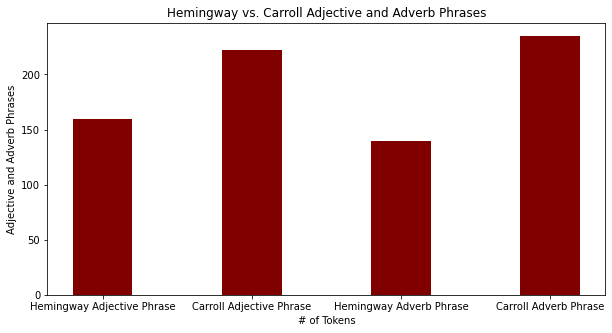

In [51]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Hemingway Adjective Phrase':160, 'Carroll Adjective Phrase':222, 'Hemingway Adverb Phrase':140,
        'Carroll Adverb Phrase':235 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("# of Tokens")
plt.ylabel("Adjective and Adverb Phrases")
plt.title("Hemingway vs. Carroll Adjective and Adverb Phrases")
plt.show()

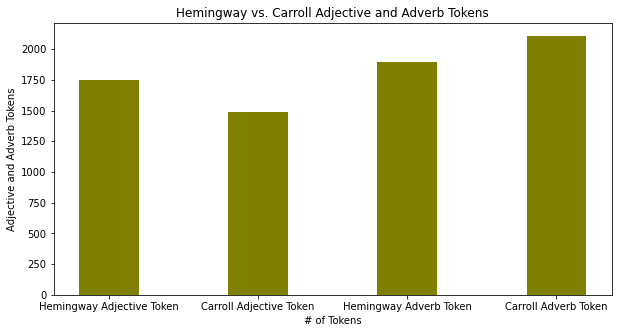

In [52]:
# creating the dataset
data = {'Hemingway Adjective Token':1745, 'Carroll Adjective Token':1488, 'Hemingway Adverb Token':1895,
        'Carroll Adverb Token':2107 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='olive',
        width = 0.4)
 
plt.xlabel("# of Tokens")
plt.ylabel("Adjective and Adverb Tokens")
plt.title("Hemingway vs. Carroll Adjective and Adverb Tokens")
plt.show()

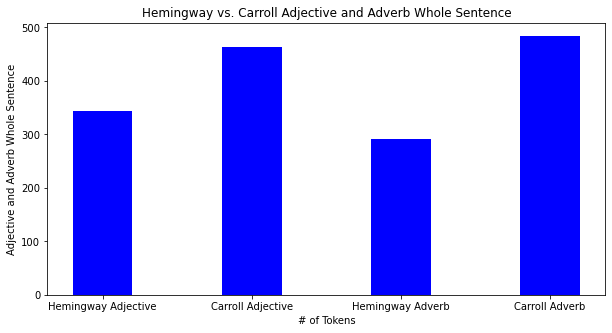

In [53]:
# creating the dataset
data = {'Hemingway Adjective':343, 'Carroll Adjective':464, 'Hemingway Adverb':291,
        'Carroll Adverb':484 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("# of Tokens")
plt.ylabel("Adjective and Adverb Whole Sentence")
plt.title("Hemingway vs. Carroll Adjective and Adverb Whole Sentence")
plt.show()